In [35]:
import pandas as pd

In [36]:

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

In [37]:
# Show column names
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [38]:
# Preview the data
print(df.shape)
df.head()

(350085, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [39]:
# Check for missing data
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

weekly_icu_admissions                   339880
weekly_icu_admissions_per_million       339880
excess_mortality                        337901
excess_mortality_cumulative_absolute    337901
excess_mortality_cumulative             337901
                                         ...  
new_deaths_smoothed                      10804
new_cases                                 9628
new_cases_per_million                     9628
new_deaths                                9574
new_deaths_per_million                    9574
Length: 63, dtype: int64

In [40]:
# Step 1: Keep relevant columns only
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 
         'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]

In [41]:
# Step 2: Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

In [42]:
# Step 3: Filter for countries of interest
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].copy()

In [43]:
# Step 4: Drop rows with missing 'date' or 'total_cases' or 'total_deaths'
df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

In [44]:
# Step 5: Forward fill missing values for smoother trend lines
df_filtered.fillna(method='ffill', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_19340\55485130.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [45]:
# Step 6: After filling, optionally drop any remaining rows with critical missing data
df_filtered.dropna(subset=['new_cases', 'new_deaths', 'total_vaccinations'], inplace=True)

In [46]:
# Step 7: Reset index
df_filtered.reset_index(drop=True, inplace=True)

Insight: Total COVID-19 Cases Over Time


The United States and India experienced sharp and sustained surges in total COVID-19 cases, while Kenya maintained a consistently low case count throughout the pandemic as shown by the diagram below.

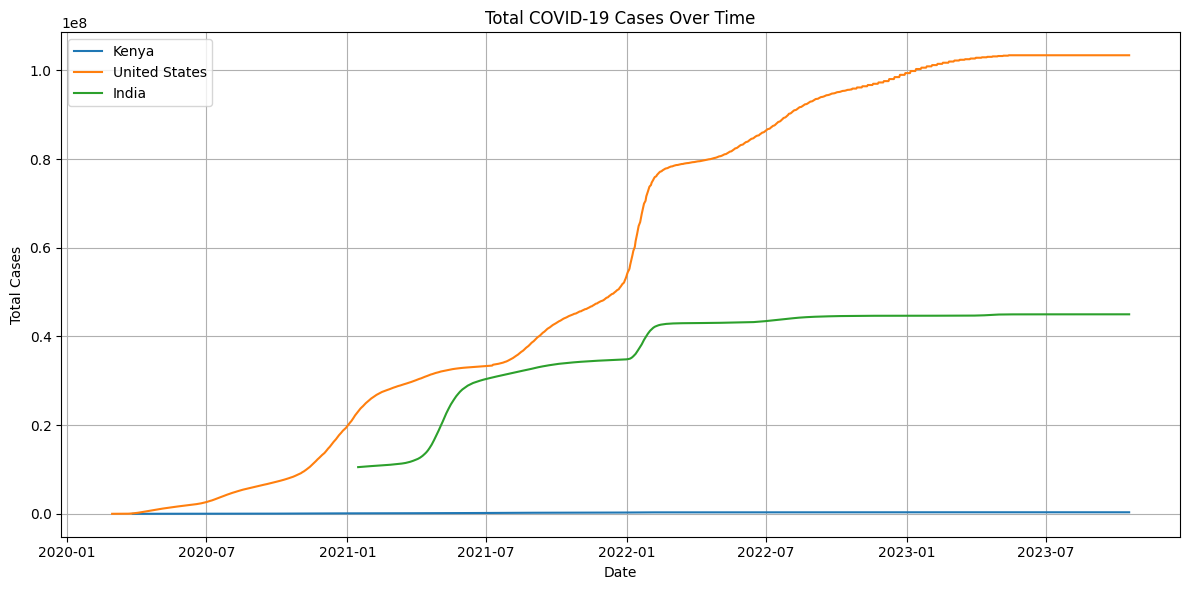

In [47]:
import matplotlib.pyplot as plt

# Plot total cases over time for each country
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


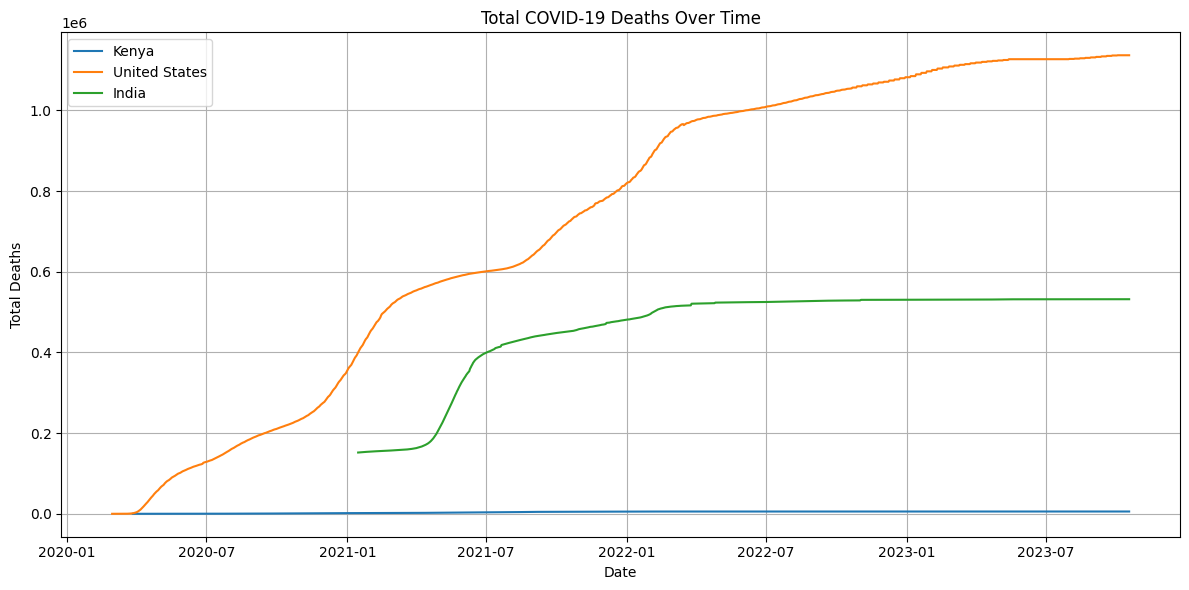

In [48]:
# Plot total deaths over time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Insight: Comparative Total COVID-19 Case Burden Across Countries

The bar chart shows that the United States had more than double the total COVID-19 cases reported in India, while Kenya's case count was negligible by comparison.

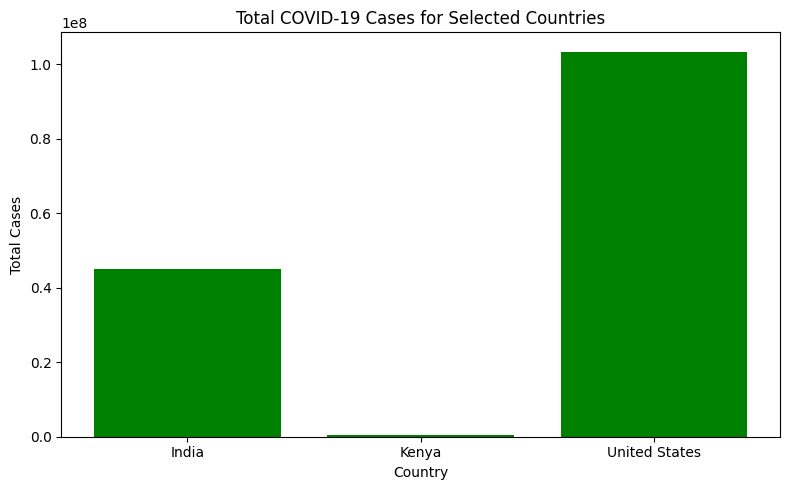

In [49]:
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
latest_data = latest_data[['location', 'total_cases']].dropna()

# Plot
plt.figure(figsize=(8,5))
plt.bar(latest_data['location'], latest_data['total_cases'], color='green')
plt.title('Total COVID-19 Cases for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19340\3485791367.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



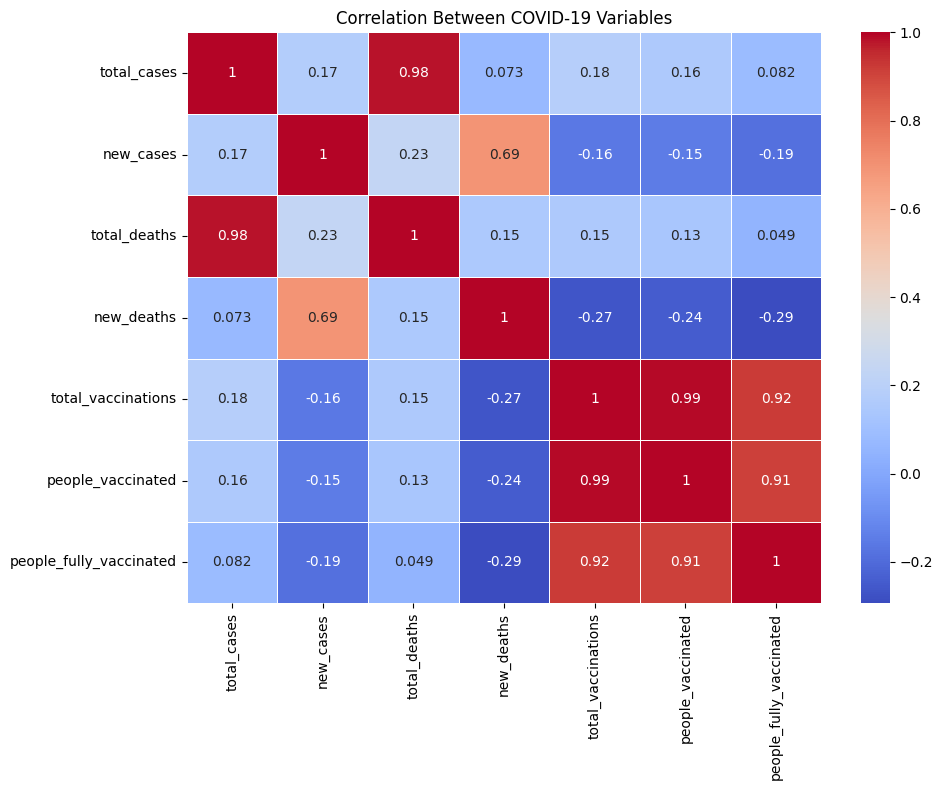

In [50]:
import seaborn as sns

# Compute correlation matrix for selected numeric columns
heatmap_data = df_filtered[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 
                            'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]

# Drop any rows with missing values in these columns
heatmap_data.dropna(inplace=True)

# Correlation matrix
corr_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between COVID-19 Variables')
plt.tight_layout()
plt.show()


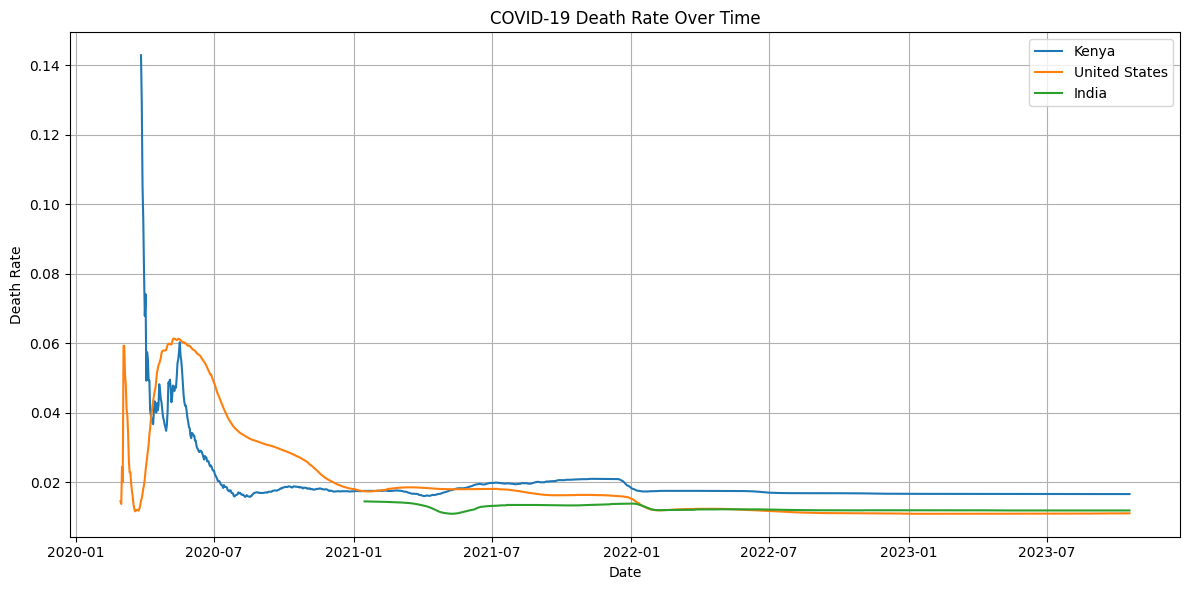

In [51]:
# Add death rate column
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Plot death rate
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


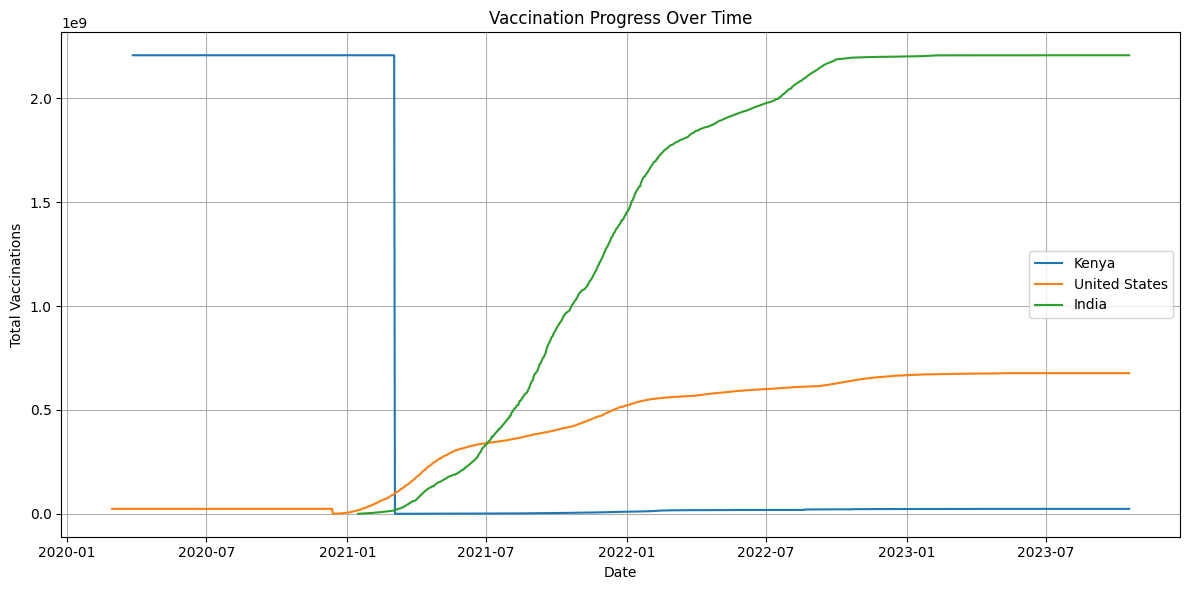

In [52]:
# Plot total vaccinations
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Insight: Fully Vaccinated Population Distribution

India recorded the highest number of fully vaccinated individuals overall, followed by the United States, while Kenya had a significantly smaller count, highlighting a global disparity in vaccine rollout and access.

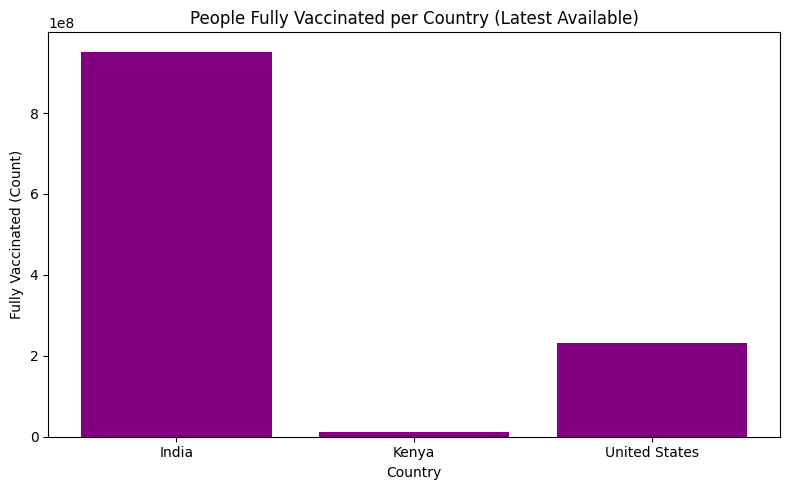

In [53]:
# Get latest data for each selected country
latest_vax = df_filtered[df_filtered['date'] == df_filtered['date'].max()]

# Select necessary columns and drop missing values
vax_percent = latest_vax[['location', 'people_fully_vaccinated', 'total_cases']].copy()
vax_percent.dropna(subset=['people_fully_vaccinated'], inplace=True)

# Optional: You can compare it against estimated population if available in the dataset (if not, skip %)
# For now, we just visualize absolute numbers

plt.figure(figsize=(8,5))
plt.bar(vax_percent['location'], vax_percent['people_fully_vaccinated'], color='purple')
plt.title('People Fully Vaccinated per Country (Latest Available)')
plt.xlabel('Country')
plt.ylabel('Fully Vaccinated (Count)')
plt.tight_layout()
plt.show()


Insight: Vaccinated vs. Unvaccinated Population Proportion

The United States and India had more than two-thirds of their populations fully vaccinated, while in Kenya, over 75% of the population remained unvaccinated—highlighting a significant disparity in vaccine coverage across countries.

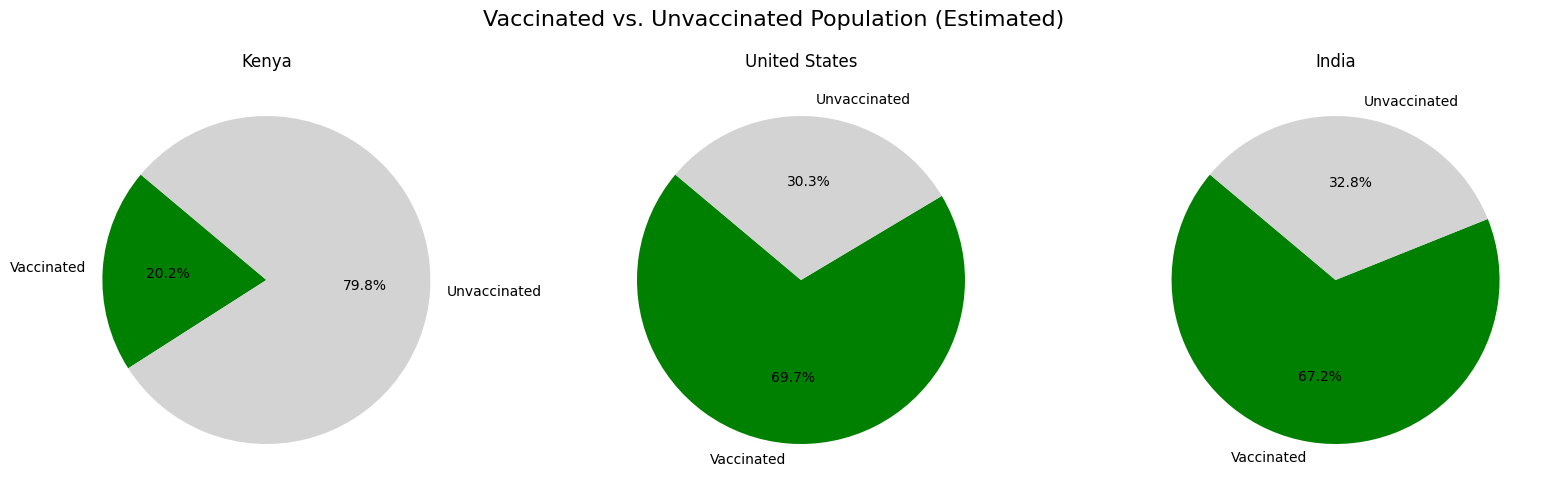

In [62]:
import matplotlib.pyplot as plt

# Estimated populations
population_estimates = {
    'United States': 331_000_000,
    'India': 1_417_000_000,
    'Kenya': 55_000_000
}

# Latest data
latest_date = df_filtered['date'].max()
latest_vax = df_filtered[df_filtered['date'] == latest_date]

# Create subplot layout
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Vaccinated vs. Unvaccinated Population (Estimated)', fontsize=16)

# Loop over countries and axes
for ax, country in zip(axes, countries):
    country_data = latest_vax[latest_vax['location'] == country]
    
    if not country_data.empty and pd.notna(country_data['people_fully_vaccinated'].values[0]):
        vaccinated = country_data['people_fully_vaccinated'].values[0]
        population = population_estimates[country]
        unvaccinated = max(population - vaccinated, 0)

        # Pie chart for each country
        ax.pie([vaccinated, unvaccinated],
               labels=['Vaccinated', 'Unvaccinated'],
               autopct='%1.1f%%',
               colors=['green', 'lightgray'],
               startangle=140)
        ax.set_title(country)
    else:
        ax.axis('off')
        ax.set_title(f"{country}\nNo Data")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [63]:
# pip install plotly
import plotly.express as px

# Prepare data for latest date
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]

# Remove aggregate rows like 'World'
latest_df = latest_df[latest_df['location'].apply(lambda x: len(x) <= 20)]

fig = px.choropleth(latest_df, 
                    locations='location',
                    locationmode='country names',
                    color='total_cases',
                    hover_name='location',
                    title='Global COVID-19 Total Cases',
                    color_continuous_scale='Reds')
fig.show()
